In [1]:
import tensorflow as tf
import numpy as np

class PGGCN(tf.keras.Model):
    def __init__(self,):
        super(PGGCN, self).__init__()

    def call(self, inputs, training=False):
        atom_features = inputs[0]
        degree_slice = tf.cast(inputs[1], dtype=tf.int32)
        membership = tf.cast(inputs[2], dtype=tf.int32)
        n_samples = tf.cast(inputs[3], dtype=tf.int32)
        deg_adjs = [tf.cast(deg_adj, dtype=tf.int32) for deg_adj in inputs[4:]]

In [2]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
# conda_installer.install()
conda_installer.install()
# !/root/miniconda/bin/conda info -e

add /home/ali/miniconda/lib/python3.6/site-packages to PYTHONPATH
all packages are already installed


In [3]:
import rdkit
import deepchem as dc
from rdkit import Chem

In [4]:
water = rdkit.Chem.rdmolfiles.MolFromPDBFile('../Datasets/SmallMolecules/water.pdb')
methane = rdkit.Chem.rdmolfiles.MolFromPDBFile('../Datasets/SmallMolecules/methane.pdb')
sulfur = rdkit.Chem.rdmolfiles.MolFromPDBFile('../Datasets/SmallMolecules/sulfur.pdb')

In [5]:
featurizer = dc.feat.ConvMolFeaturizer(per_atom_fragmentation=False)

In [6]:
water_f = featurizer(water)[0]
methane_f = featurizer(methane)[0]
sulfur_f = featurizer(sulfur)[0]

In [7]:
m = Chem.MolFromSmiles('Cc1ccccc1')

In [8]:
m_f = featurizer(m)[0]

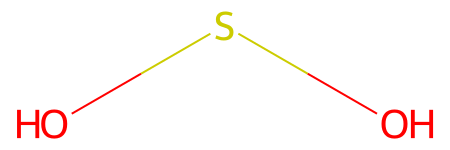

In [9]:
sulfur

In [11]:
sulfur_f.deg_slice

array([[0, 0],
       [0, 2],
       [2, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

In [34]:
sulfur_f.get_adjacency_list()

[[2], [2], [0, 1]]

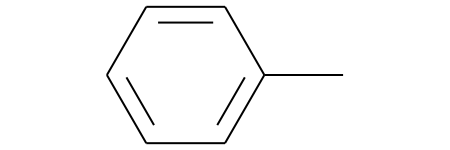

In [35]:
m

In [37]:
m_f.get_adjacency_list()

[[6], [6, 2], [1, 3], [2, 4], [3, 5], [4, 6], [0, 1, 5]]

In [81]:
mols = [m_f, water_f, methane_f]
num_mols = len(mols)

In [82]:
atoms_by_deg = np.concatenate([x.atom_features for x in mols])

In [83]:
degree_vector = np.concatenate([x.degree_list for x in mols], axis=0)

In [93]:
order

array([7, 8, 0, 1, 2, 3, 4, 5, 6])

In [94]:
ordered[order]

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [89]:
order = degree_vector.argsort(kind='mergesort')
ordered = np.empty(order.shape, np.int32)
ordered[order] = np.arange(order.shape[0], dtype=np.int32)
ordered

array([2, 3, 4, 5, 6, 7, 8, 0, 1], dtype=int32)

In [96]:
all_atoms = atoms_by_deg[order]

In [102]:
mol_atom_map = []
index_start = 0
for mol in mols:
    mol_atom_map.append(
      ordered[index_start:index_start + mol.get_num_atoms()])
    index_start += mol.get_num_atoms()

In [105]:
mol_deg_sz = np.zeros([10 + 1, num_mols], dtype=np.int32)
for i, mol in enumerate(mols):
    mol_deg_sz[:, i] += mol.deg_slice[:, 1]

In [ ]:
multiConvMol = ConvMol.agglomerate_mols([])

In [125]:
inputs = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
    inputs.append(multiConvMol.get_deg_adjacency_lists()[i])

In [115]:
mol_deg_sz

array([[0, 1, 1],
       [1, 0, 0],
       [5, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)